<div class="list-group" id="list-tab" role="tablist">
<a id="10"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0; color:white' role="tab" aria-controls="home"><center>Linear Regression!
 </center></h2>

<img src = "https://www.digitalvidya.com/wp-content/uploads/2019/03/Linear-Regression.jpg" >   

**Purpose of this kernel will cover all the basic concepts related to Linear Regression.**

`Linear regression` is used for finding linear relationship between `target` and one or more `predictors`. 

There are two types of **Linear Regression**:

1. Simple Linear Regression 
2. Multiple Linear Regression.

The core idea is to obtain a line that `best fits` the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. 

`Error` is the distance between the point to the regression line.

Example of Linear Regression below:

<img src = "https://miro.medium.com/max/875/1*dToo8pNrhBmYfwmPLp6WrQ.png">

Let's check `Simple Linear Regression` in detail!

# Simple Linear Regression

Simple linear regression is useful for finding relationship between two continuous variables. 

One is `predictor` or `independent variable` and other is `response` or `dependent` variable. 

It looks for `statistical relationship` but not `deterministic relationship`. 

Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. 

For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. 

Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.

### Example - Simple Linear Regression

Assume we have a dataset which contains information about relationship between `number of hours studied` and `marks obtained`. 

Many students have been observed and their hours of study and grade are recorded. 

Our goal is to design a model that can predict marks if given the number of hours studied. 

Using the training data, a regression line is obtained which will give minimum error. 

This linear equation is then used for any new data. That is, if we give number of hours studied by a student as an input, our model should predict their mark with minimum error.

**Y(pred) = b0 + b1*x**

**The values b0(intercept) and b1(slope) must be chosen so that they minimize the error.**

As discussed earlier, the goal is to find the `best fit line` which can be achieved by minimising the expression of **RSS (Residual Sum of Squares)** which is equal to the sum of squares of the residual for each data point in the plot. 

Residuals for any data point is found by subtracting predicted value of dependent variable from actual value of dependent variable, see the image below:

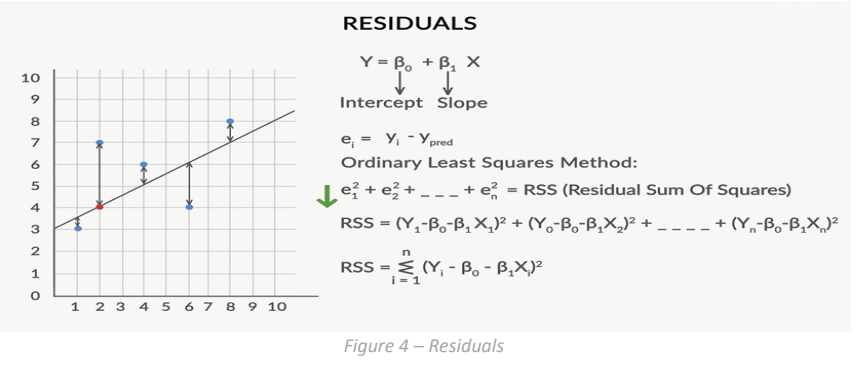

# Multiple Linear Regression

Multiple linear regression is a statistical technique to understand the relationship between one dependent
variable and several independent variables (explanatory variables).

The objective of multiple regression is to find a linear equation that can best determine the value of
dependent variable Y for different values independent variables in X.

Consider another example where we need to make sales prediction using TV Marketing budget. 

In real life scenario, the marketing head would want to look into the dependency of sales on the budget allocated to different
marketing sources. Here, we have considered three different marketing sources, i.e. TV marketing, Radio
marketing, and Newspaper marketing.

The simple linear regression model is built on a straight line which has the following formula:
**Y(pred) = b0 + b1*x**

Multiple linear regression also uses a linear model that can be formulated in a very similar way.

Thus, the equation of multiple linear regression would be as follows: 
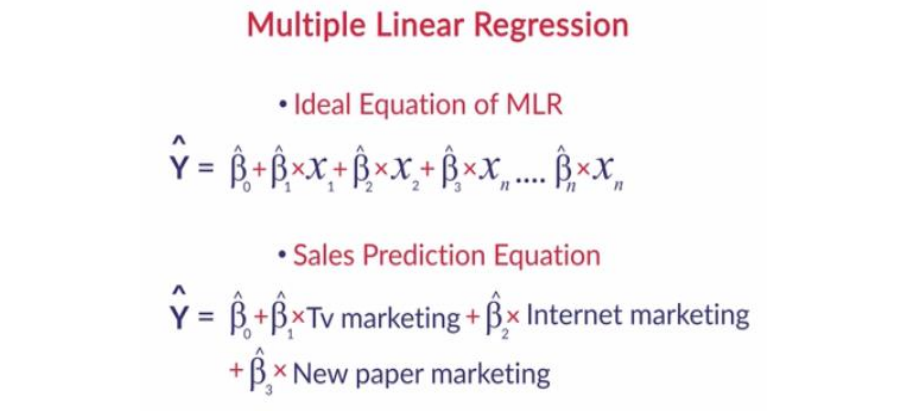

**We will now try to build a Linear Regression Model and will asses it's performance!**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Dataset we are going to use here has data related to some customers who have opted for an Insurance, we need to predict the Insurance Premium based on the dependent features. let's check the dataset first**

In [ ]:
train = pd.read_csv("/kaggle/input/insurance-premium-prediction/insurance.csv")
train.head()

So, we have been provided with age, sex, bmi, no. of children, somke, region and expenses.

Here, expenses is our target variable.

In [ ]:
train.shape

In [ ]:
train.isnull().sum()

In [ ]:
train.info()

### Let's check some statistics

In [ ]:
for col in train.columns:
    print(Fore.BLUE + "Feature Name:",col,Style.RESET_ALL)
    print(Fore.YELLOW + "",train[col].describe(),Style.RESET_ALL)
    print(Fore.RED + "-------------------------------------------------")
    print("-------------------------------------------------",Style.RESET_ALL)

By looking at the above numbers, we can say that the data is in good shape and does not require any pre-processing.
We will still check for outliers in a while!

Now, lets check how numeric data is distributed!

In [ ]:
num_cols = ["age",'bmi','expenses','children']

plt.figure(figsize = (15,10))

for idx,col in enumerate(num_cols):
    plt.subplot(2,2,idx+1)
    sns.distplot(train[col])

Only bmi is normally distributed!

# EDA

### Univariate Analysis

In [ ]:
# helper function to perform univariate analysis
def univariate(feat):
    count = train[feat].value_counts()
       
    print("--------------------" + feat + " Distribution (counts)------------------")
    print(count)

    print("--------------------" + feat + " Distribution (in %)------------------")    
    if feat == "region":
        val1 = count.values[0]
        val2 = count.values[1]
        val3 = count.values[2]
        val4 = count.values[3]
    else:
        val1 = count.values[0]
        val2 = count.values[1]

    
    if feat == "region":
        print("% of " + count.index[0] + ":", (val1/train.shape[0]) * 100)
        print("% of " + count.index[1] + ":", (val2/train.shape[0]) * 100)
        print("% of " + count.index[2] + ":", (val3/train.shape[0]) * 100)
        print("% of " + count.index[3] + ":", (val4/train.shape[0]) * 100)
    else:
        print("% of " + count.index[0] + ":", (val1/train.shape[0]) * 100)
        print("% of " + count.index[1] + ":", (val2/train.shape[0]) * 100)

    # lets visualize what we discussed above
    plt.figure(figsize = (8,6))
    if feat == "region":
        plt.bar(count.index, count.values,color = ['g','b','y','r'])
    else:
        plt.bar(count.index, count.values,color = ['g','b'])
        
    plt.show()

In [ ]:
univariate("sex")

There are almost equal no. of males and females in the given data

In [ ]:
univariate("smoker")

There are more non-smokers than smokers!

In [ ]:
univariate("region")

There is good amount of representation from all the four areas!

### Bi-Variate Analysis
#### Let's check how many smokers are male/female

In [ ]:
sns.countplot(train.sex,hue=train.smoker)

Almost equal no. of male/female are smokers/non-smokers!

### Let's now check relation of various features with the target variable

In [ ]:
sns.pairplot(train)

Age and BMI seems to have a good relation with the target variable. 
Let's check co-relation between variables now!

In [ ]:
sns.pairplot(train,hue="smoker")

In [ ]:
sns.pairplot(train,hue="sex")

### Multicollinearity

It may be that some variables could have some relation amongst themselves; 

In other word, the variables may be highly collinear to each other. A simple way to detect collinearity is to look at the correlation matrix of the independent variables as shown.

In [ ]:
corrMatrix = train.corr()
mask = np.triu(corrMatrix)
sns.heatmap(corrMatrix,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',            
            mask=mask,
            linewidths=1,
            cbar=False)
plt.show()

A large value in this matrix would indicate a pair of highly correlated variables. 

Unfortunately, not all collinearity problems can be detected by the inspection of the correlation matrix. It is possible for
collinearity to exist between three or more variables even if no pair of variables has a high correlation.

This situation is called `multicollinearity`.

A better way to assess multicollinearity is to compute the `variance inflation factor (VIF)`.

Since one of the major goals of linear regression is identifying the important explanatory variables, it is important to assess the impact of each and then keep those which have a significant impact on the outcome. 

This is the major issue with multicollinearity. Multicollinearity makes it difficult to assess the effect of individual predictors. 

A variable with a high VIF means it can be largely explained by other independent variables. Thus, you have to check and remove variables with a high VIF after checking for pvalues, implying that their impact on the outcome can largely be explained by other variables. Thus, removing the variable with a high VIF would make it easier to assess the impact of other variables, while
making little difference to the predicted outcome.

The higher the VIF, the higher the multicollinearity. But remember — variables with a high VIF or multicollinearity may be statistically significant p<0.05, in which case you will first have to check for other insignificant variables before removing the variables with a higher VIF and lower p-values. You can took VIF = 2 as the threshold, but in real business scenarios, it will depend on the case requirements

# Let's Build the Model

In [ ]:
train.sex = train.sex.astype("category")
train.sex = train.sex.cat.codes + 1

In [ ]:
train.region = train.region.astype("category")
train.region = train.region.cat.codes + 1

In [ ]:
train.smoker = train.smoker.astype("category")
train.smoker = train.smoker.cat.codes + 1

In [ ]:
# scale numeric features
scale = ['age','bmi','children']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply scaler() to all the columns
train[scale] = scaler.fit_transform(train[scale])

In [ ]:
train.describe()

In [ ]:
X = train.drop('expenses',1)
y = train.expenses

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=100)

In [ ]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()
#You don't need to specify an object to save the result because 'lr' will take the results of the fitted model.
lr.fit(X_train, y_train)

In [ ]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

# Model Evaluation (Visualization)

We have built the model, now its time to evaluate its peformance.

We will use MSE & R-Squared metrices to evaluate the performance of our model. But, before we do that, let's visualize our actual vs predicted values! 

### Visualize Actual Vs Predicted

In [ ]:
# Actual vs Predicted
plt.figure(figsize = (15,10))

c = [i for i in range(1,len(X_test.index)+1,1)] # generating index

plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
plt.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18) 

### Visualize Error Terms(Actual - Predicted)

In [ ]:
# Error terms
plt.figure(figsize = (15,10))

c = [i for i in range(1,len(X_test.index)+1,1)] # generating index

plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
plt.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('ytest-ypred', fontsize=16) 

# Model Evaluation(Regression Metrics)

This is the more formal way to evaluate the performance of a linear regresion model rather than plotting error terms etc.

There are various metrics used to evaluate the performance of the model :

* Mean Squared Error(MSE)
* Root-Mean-Squared-Error(RMSE).
* Mean-Absolute-Error(MAE).
* R² or Coefficient of Determination.
* Adjusted R²

Let's discuss them one by one!

### Mean Squared Error: 

`MSE or Mean Squared Error` is one of the most preferred metrics for regression tasks. 

It is simply the average of the squared difference between the target value and the value predicted by the regression model. 

As it squares the differences, it penalizes even a small error which leads to over-estimation of how bad the model is. 

It is preferred more than other metrics because it is differentiable and hence can be optimized better.

<img src = "https://miro.medium.com/max/875/0*aTUPK_ILg7-n0znw.jpg">

### Root Mean Squared Error: 

RMSE is the most widely used metric for regression tasks and is the square root of the averaged squared difference between the target value and the value predicted by the model. 

It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors.

This implies that RMSE is useful when large errors are undesired.

<img src = "https://miro.medium.com/max/650/0*TO7BkvQwtnvVzkK4.png">

### Mean Absolute Error: 

MAE is the absolute difference between the target value and the value predicted by the model.

The MAE is more robust to outliers and does not penalize the errors as extremely as mse. 

MAE is a linear score which means all the individual differences are weighted equally. 

It is not suitable for applications where you want to pay more attention to the outliers.

<img src = "https://miro.medium.com/proxy/0*zX9jlpZ8k0CuEpFE.jpg">

### R² Error: 

Coefficient of Determination or R² is another metric used for evaluating the performance of a regression model. 

The metric helps us to compare our current model with a constant baseline and tells us how much our model is better. 

The constant baseline is chosen by taking the mean of the data and drawing a line at the mean. 

R² is a scale-free score that implies it doesn't matter whether the values are too large or too small, the R² will always be less than or equal to 1.

<img src = "https://miro.medium.com/max/783/0*_Bk3m941thWlveS3.png">

R² Can also be represented as:
`R² = 1 - (RSS / TSS)`
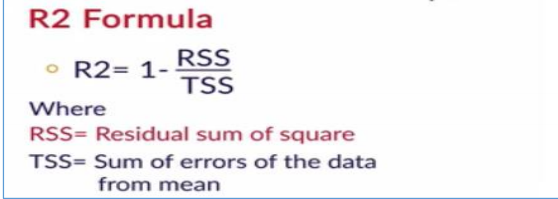


**Let's check RSS(MSE) and TSS(MSE(Model Baseline) in more detail:**

**RSS (Residual Sum of Squares):** In statistics, it is defined as the total sum of error across the whole sample.

It is the measure of the difference between the expected and the actual output. A small RSS indicates a tight fit of the model to the data. It is also defined as follows:

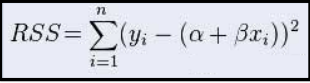

**TSS (Total sum of squares):**

It is the sum of errors of the data points from mean of response variable. Mathematically, TSS is:
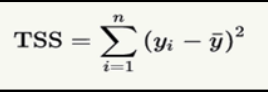

**Importance of RSS/TSS:**

Think about it for a second. If you know nothing about linear regression and still have to draw a line to represent those points, the least you can do is have a line pass through the mean of all the points as shown below.

This is the worst possible approximation that you can do. TSS gives us the deviation of all the points from the mean line
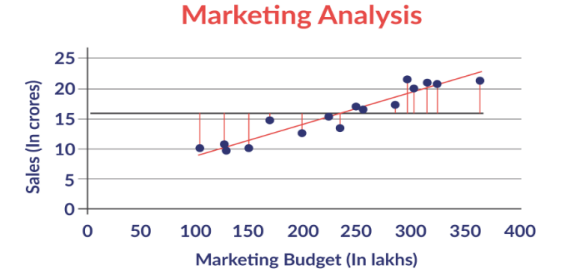

Trying to reinforce this understanding of R2 visually, you can look at the 4 graphs of marketing data and compare the corresponding R2 values.

* In Graph 1: All the points lie on the line and the R2 value is a perfect 1
* In Graph 2: Some points deviate from the line and the error is represented by the lower R2 value of 0.70
* In Graph 3: The deviation further increases and the R2 value further goes down to 0.36
* In Graph 4: The deviation is further higher with a very low R2 value of 0.05

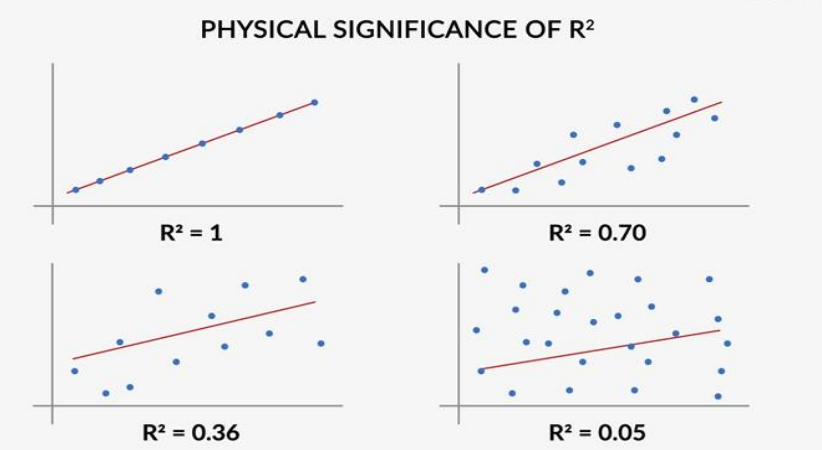

### Adjusted R²: 

Adjusted R² depicts the same meaning as R² but is an improvement of it.

R² suffers from the problem that the scores improve on increasing terms even though the model is not improving which may misguide the researcher. 

Adjusted R² is always lower than R² as it adjusts for the increasing predictors and only shows improvement if there is a real improvement.

<img src = "https://miro.medium.com/max/495/0*WkdWEm2993yhYvUA.png">

**Important note about R-Squared & Adjusted R-Squared**

In multiple variable regression, adjusted R-squared is a better metric than R-squared to assess how good the model fits the data. 

R-squared always increases if additional variables are added into the model, even if they are not related to the dependent variable. R-squared thus is not a reliable metric for model accuracy. 

Adjusted R-squared, on the other hand, penalises R-squared for unnecessary addition of variables. So, if the variable added does not increase the accuracy adequately, adjusted R-squared decreases although R-squared might increase.

Now, we have a fair idea about regression metrices, lets now check MSE & R-Squared values for the models that we have built.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

The r square value is about 80% which means our model is able to explain 80% of the variance which is good.
We will learn more about r-square later in this notebook.

Above, we built a model with all the variables, we may not require all the variables to build the model, few of them may be insignificant. let rebuild the model using statsmodel.api so that we can see some important properties of the model built

# Build Model using OLS from statsmodel.api

In [ ]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels.

And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

### Let's try to understand few of the statistics shown above

`coef(Coefficient)` - You can see the estimated value of the intercept is around -1.408e+04, and the estimated coefficients of Age is 3707.94, Sex is 13.28, bmi is 1882, childern is 572, smoker is 2.348e+04 and region is -384.

`standard error`. It measures the variability in the estimate for these coefficients. 

A lower value of standard deviation is good but it is somewhat relative to the value of the coefficient. 

E.g. you can check the standard error of the intercept is about 909.559, whereas its estimate is -1.408e+04, So, it can be interpreted that the variability of the intercept is from -1.408e+04±909.559. 

Note that standard error is absolute in nature and so many a times, it is difficult to judge whether the model is good or not.

`t-value` It is the ratio of the estimated coefficients to the standard deviation of the estimated coefficients. 

It measures whether or not the coefficient for this variable is meaningful for the model. Though you may not use this value itself, you should know that it is used to calculate the p-value and the significance levels which are used for building the final model.

`p-value` - A very important parameter of this analysis is the p-value, it is used for hypothesis testing. 

Here, in regression model building, the `null hypothesis` corresponding to each p-value is that the corresponding independent variable does not impact the dependent variable. 

`The alternate hypothesis is that the corresponding independent variable impacts the response.` 

Now, p-value indicates the probability that the null hypothesis is true. Therefore, a low p-value, i.e. less than 0.05,
indicates that you can reject the null hypothesis. 
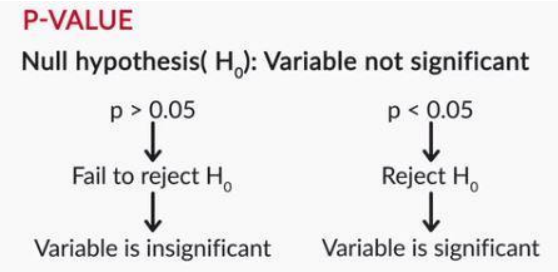

## Let's check VIF

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

VIF is good for all the variables, but p-value of "sex" is greater than 0.05, this variable becomes insignificant and we can drop this variable.

In [ ]:
X_train_sm.drop("sex",1,inplace=True)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

All the p-values are good now, let's rebuild the model

In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_test) # this should ideally be X_test_sm, but i want negative r-squared thats why kept X_test

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

### Why is R² Negative?

There is a misconception among people that R² score ranges from 0 to 1 but actually it ranges from -∞ to 1. 

Due to this misconception, they are sometimes scared why the R² is negative which is not a possibility according to them.

**The main reasons for R² to be negative are the following:**

1) One of the main reason for R² to be negative is that the chosen model does not follow the trend of the data causing the R² to be negative. This causes the mse of the chosen model(numerator) to be more than the mse for constant baseline(denominator) resulting in negative R².

<img src="https://miro.medium.com/max/531/0*fLHizx3eMNBiV1od.png">

2) Maybe there are a large number of outliers in the data that causes the mse of the model to be more than mse of the baseline causing the R² to be negative(i.e the numerator is greater than the denominator).

3) Sometimes while coding the regression algorithm, the researcher might forget to add the intercept to the regressor which will also lead to R² being negative. 

This is because, without the benefit of an intercept, the regression could do worse than the sample mean(baseline) in terms of tracking the dependent variable (i.e., the numerator could be greater than the denominator). 

However, most of the standard machine learning library like scikit-learn include the intercept by default but if you are using stats-model library then you have to add the intercept manually.

Reason why we got negative R-square above is, we delibiretly missed adding constant to X_test.

### Let'check/remove outliers and rebuilt the model

In [ ]:
# lets create boxplots to detect outliars detection 
plt.figure(figsize=(16,48))
for idx,col in enumerate(['age','bmi','children','region']):
    plt.subplot(11,2,idx+1)
    plt.boxplot(train[col])
    plt.xlabel(col)

In [ ]:
# lets handle the outliers
q3 = train.bmi.quantile(0.75)
train = train[train.bmi <= q3]

In [ ]:
X = train.drop(['expenses','sex'],1)
y = train.expenses

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=100)

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

we can now make predictions using this model as we did earlier!

In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_test_sm)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Even though R squared is lesser than our earlier model, but this model may be a better choice because we have removed an insignificant variable.

# Assumptions of Linear Regression

### Distribution of the error terms(should follow normal distribution)

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
res = (y_test - y_pred)

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Actual - Predicted', fontsize = 15)         # X-label
plt.show()

Error terms are not following normal distribution, which is not a good indication!

Let's look at the patter in the the error terms now.

In [ ]:
plt.scatter(y_test,res)
plt.show()

The variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.